In [23]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

In [3]:
def calculateErrorSurface(y, x1, x2):
    """
    Generate data points for plotting the error surface.
    """
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-20.0, 24.0, M)
    a2 = np.linspace(-20.0, 24.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/N)*np.sum(np.square(y - yhat));            
            
    return J, A1, A2

In [4]:
# Number of pairs feature/label.
N = 10000

## Modelo Gerador #1: $x_1 \gg x_2$

$x_1 = 2 * \text{randn()}$

$x_2 = \text{randn()}$

$y = x_1 + x2$

In [5]:
# Input values (features)
x1 = 2*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

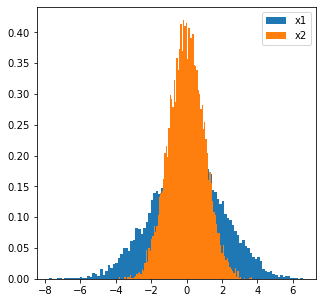

In [6]:
fig = plt.figure(figsize=(5,5))
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.legend()
plt.savefig("hist_molde1.png", dpi=600)
plt.show()

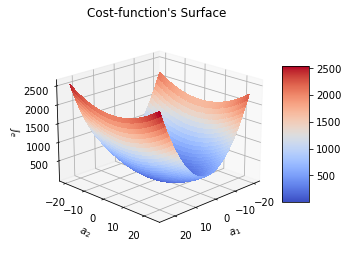

In [7]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
plt.savefig("error_surface_model1.png", dpi=600)
#Show the plot.
plt.show()

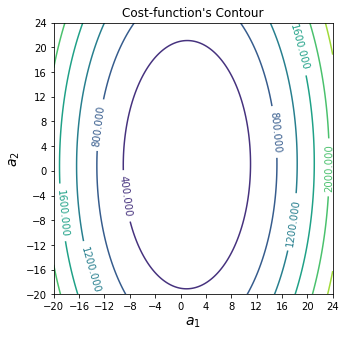

In [8]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

## Modelo Gerador #2: $x_2 \gg x_1$

$x_1 = \text{randn()}$

$x_2 = 2 * \text{randn()}$

$y = x_1 + x2$

In [9]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(seed)

# Input values (features)
x1 = np.random.randn(N, 1)
x2 = 2 * np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

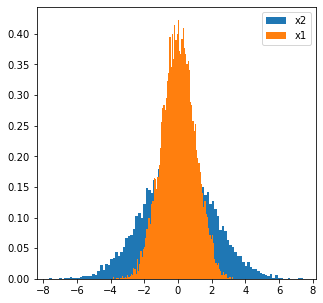

In [10]:
fig = plt.figure(figsize=(5,5))
plt.hist(x2, bins=100, density=True, label='x2')
plt.hist(x1, bins=100, density=True, label='x1')
plt.legend()
plt.savefig("hist_molde2.png", dpi=600)
plt.show()

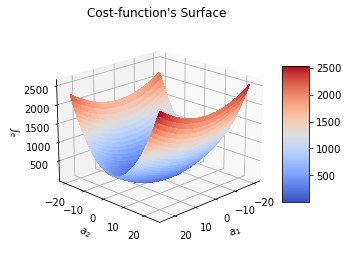

In [11]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
plt.savefig("error_surface_model2.png", dpi=600)
#Show the plot.
plt.show()

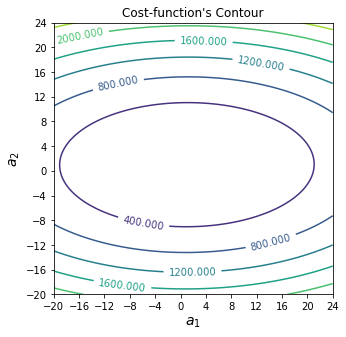

In [12]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

## Aplicando padronização ao modelo gerador #1

In [13]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(seed)

# Input values (features)
x1 = 2*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

In [14]:
# Import Class StandardScaler from module Preprocessing of 
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Concatenate both column vectors.
X = np.c_[x1, x2]

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

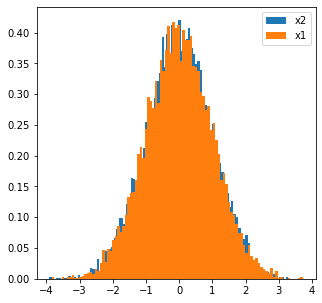

In [15]:
fig = plt.figure(figsize=(5,5))
plt.hist(scaled_x1, bins=100, density=True, label='x2')
plt.hist(scaled_x2, bins=100, density=True, label='x1')
plt.legend()
plt.savefig("hist_molde3.png", dpi=600)
plt.show()

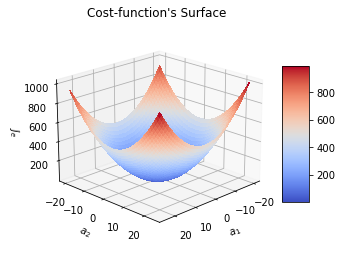

In [16]:
J, A1, A2 = calculateErrorSurface(y_noisy, scaled_x1, scaled_x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
plt.savefig("error_surface_model3.png", dpi=600)
#Show the plot.
plt.show()

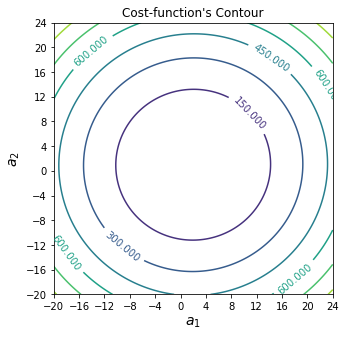

In [17]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()

## Aplicando padronização ao modelo gerador #2

In [18]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(seed)

# Input values (features)
x1 = np.random.randn(N, 1)
x2 = 2*np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + np.random.randn(N, 1)

In [19]:
# Import Class StandardScaler from module Preprocessing of 
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Concatenate both column vectors.
X = np.c_[x1, x2]

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

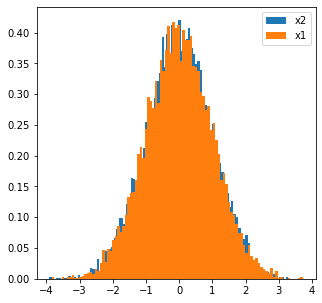

In [20]:
fig = plt.figure(figsize=(5,5))
plt.hist(scaled_x1, bins=100, density=True, label='x2')
plt.hist(scaled_x2, bins=100, density=True, label='x1')
plt.legend()
plt.savefig("hist_molde4.png", dpi=600)
plt.show()

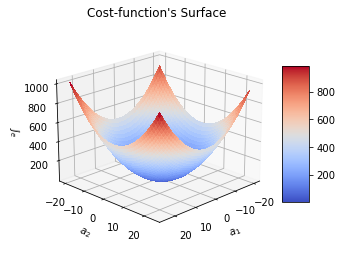

In [21]:
J, A1, A2 = calculateErrorSurface(y_noisy, scaled_x1, scaled_x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
plt.savefig("error_surface_model4.png", dpi=600)
#Show the plot.
plt.show()

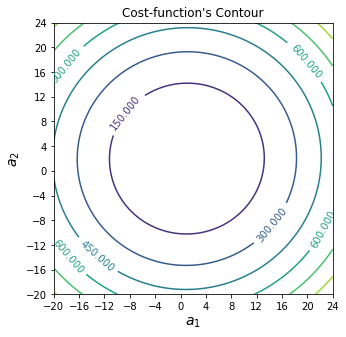

In [22]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-20, 28, step=4.0))
plt.yticks(np.arange(-20, 28, step=4.0))
plt.show()